In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

# 文件路径
file_path = r'C:\Users\86189\Desktop\github_bot_processed_data.csv'

# 1. 读取数据集
data = pd.read_csv(file_path)

In [2]:
# 2. 探索pandas显示选项，显示更多数据行和列
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

# 3. 查看数据的前几行和数据类型
print("数据的前几行：")
print(data.head())

print("\n数据的信息：")
print(data.info())

数据的前几行：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6 

In [3]:
# 4. 生成数据的描述性统计信息
print("\n数据的描述性统计信息：")
print(data.describe())


数据的描述性统计信息：
       public_repos  public_gists     followers     following  text_bot_count
count  19768.000000  19768.000000  19768.000000  19768.000000    19768.000000
mean      84.139215     25.214083    245.497015     44.520741        0.061362
std      574.750217    635.690142   1535.939961    366.793439        0.341003
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%       11.000000      0.000000      7.000000      0.000000        0.000000
50%       35.000000      2.000000     33.000000      4.000000        0.000000
75%       83.000000     10.000000    125.000000     22.000000        0.000000
max    50000.000000  55781.000000  95752.000000  27775.000000        5.000000


E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


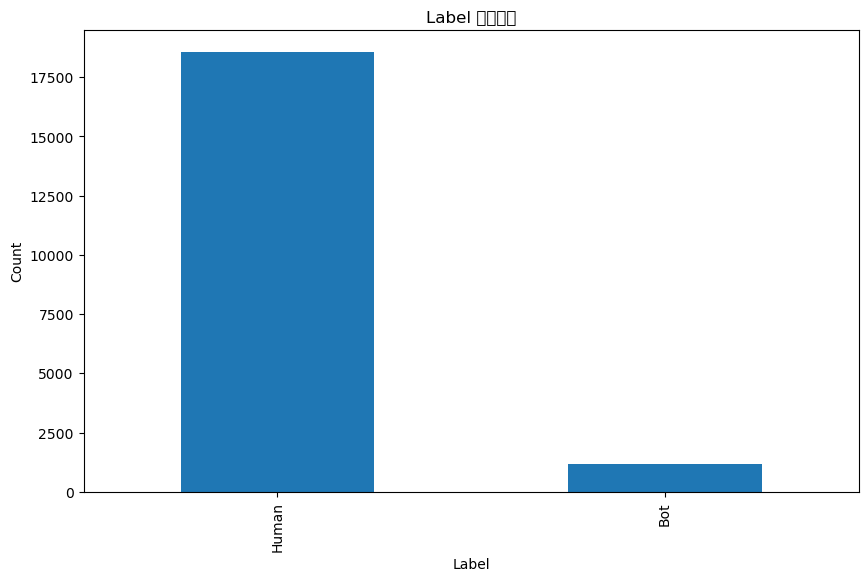

In [4]:
# 5. 格式化处理日期、货币、百分比等
if 'date' in data.columns:
    data['formatted_date'] = pd.to_datetime(data['date'])
if 'salary' in data.columns:
    data['formatted_salary'] = data['salary'].apply(lambda x: f"${x:,.2f}")
if 'percentage' in data.columns:
    data['formatted_percentage'] = data['percentage'].apply(lambda x: f"{x:.2%}")
# 6. 对数变换
numeric_cols = ['public_repos', 'public_gists', 'followers', 'following']
for col in numeric_cols:
    if col in data.columns:
        data[f'log_{col}'] = np.log1p(data[col])

# 7. 使用Matplotlib绘制图表
plt.figure(figsize=(10, 6))
# 条形图：展示label列的类别分布
if 'label' in data.columns:
    data['label'].value_counts().plot(kind='bar')
    plt.title("Label 类别分布")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()


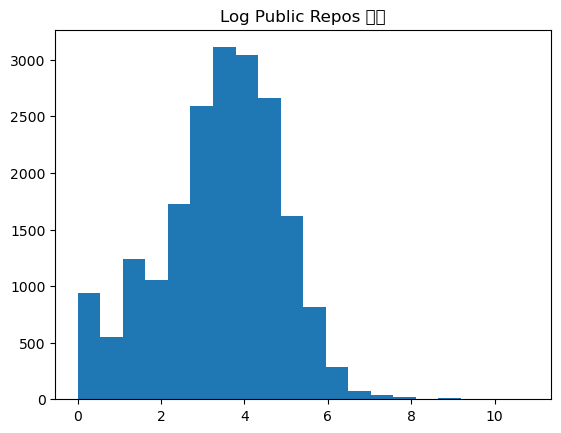

In [5]:
# 直方图：展示log_public_repos
if 'log_public_repos' in data.columns:
    plt.hist(data['log_public_repos'], bins=20)
    plt.title("Log Public Repos 分布")
    plt.show()

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


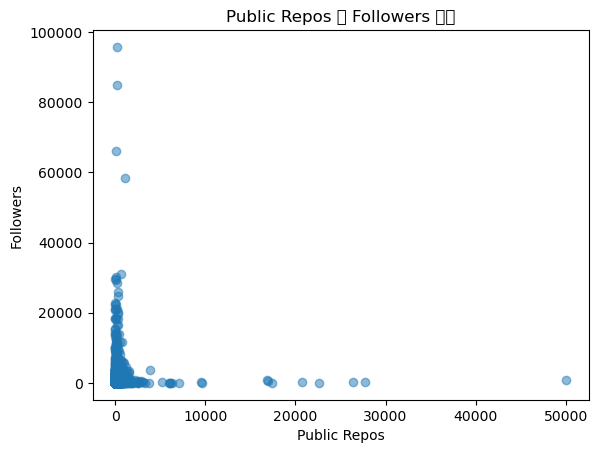

In [6]:
# 散点图：展示public_repos与followers之间的关系
if 'public_repos' in data.columns and 'followers' in data.columns:
    plt.scatter(data['public_repos'], data['followers'], alpha=0.5)
    plt.title("Public Repos 与 Followers 关系")
    plt.xlabel("Public Repos")
    plt.ylabel("Followers")
    plt.show()

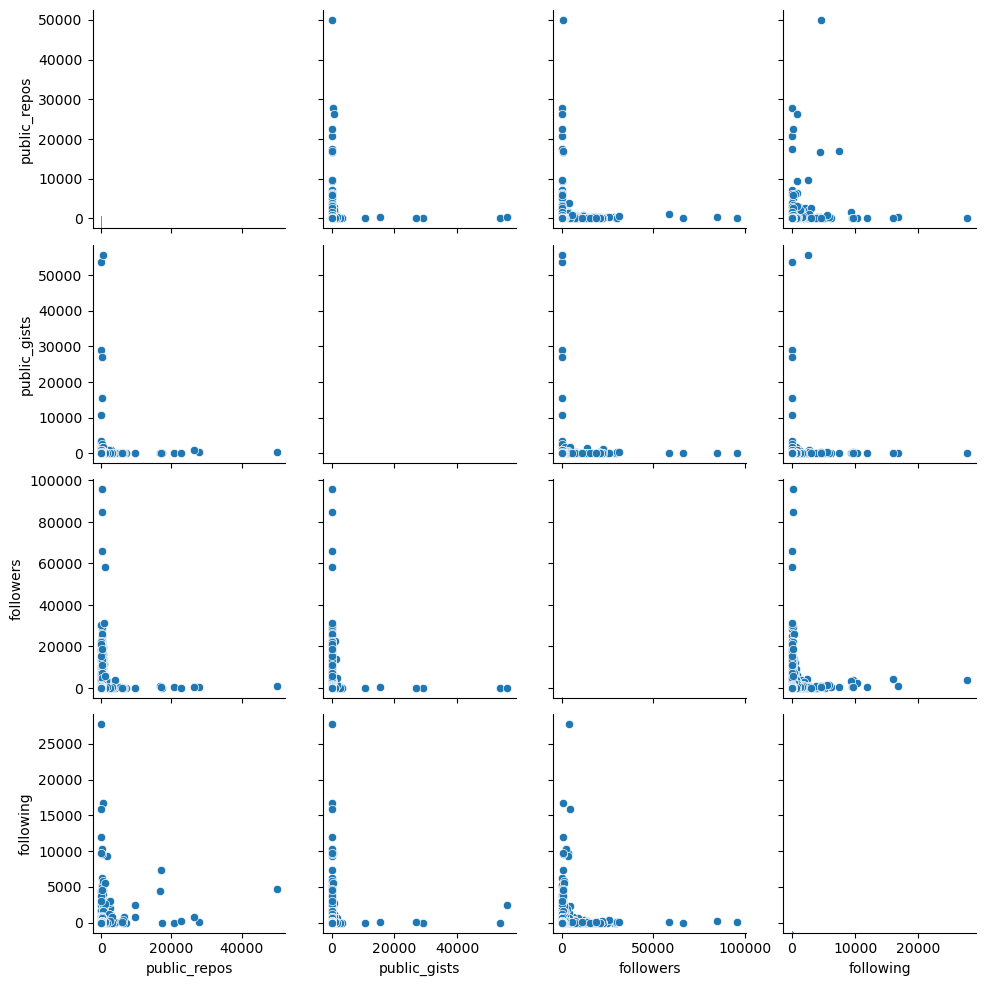

In [7]:
# 散点矩阵：展示数值特征之间的成对关系
sns.pairplot(data[numeric_cols])
plt.show()

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

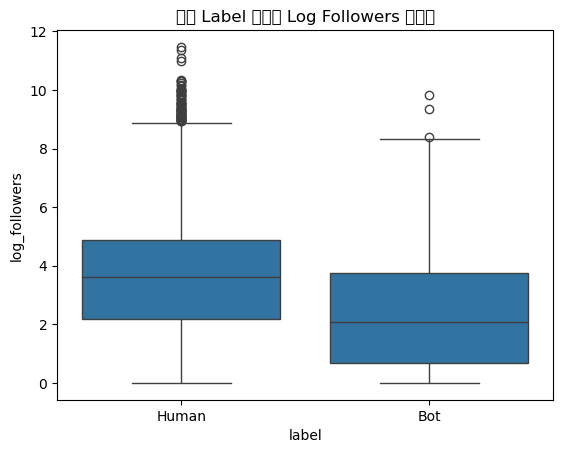

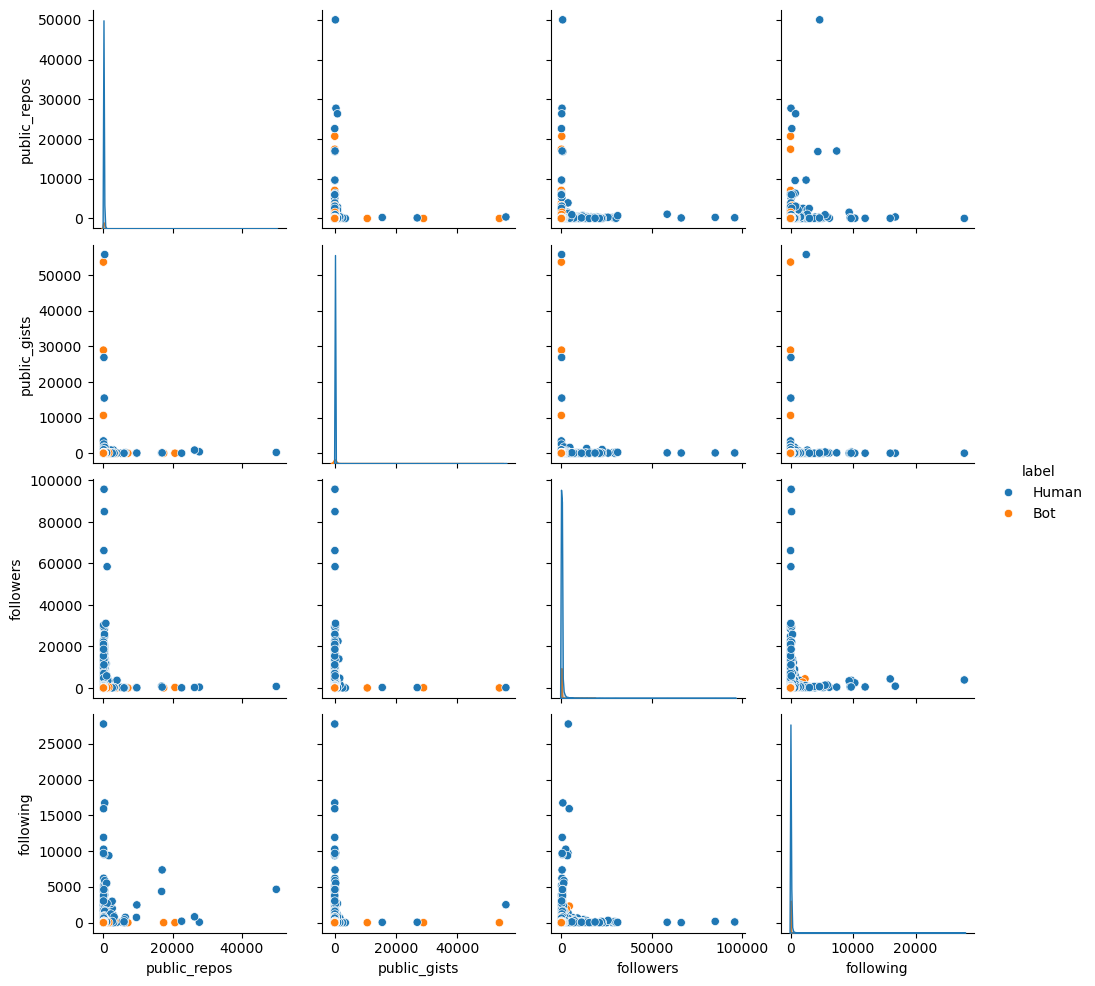

In [8]:
# 8. 使用Seaborn绘制图表
# 箱线图：展示不同label类别下log_followers的分布
if 'label' in data.columns and 'log_followers' in data.columns:
    sns.boxplot(x='label', y='log_followers', data=data)
    plt.title("不同 Label 类别下 Log Followers 的分布")
    plt.show()

# 成对图：展示不同特征之间的关系
sns.pairplot(data[numeric_cols + ['label']], hue='label')
plt.show()

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

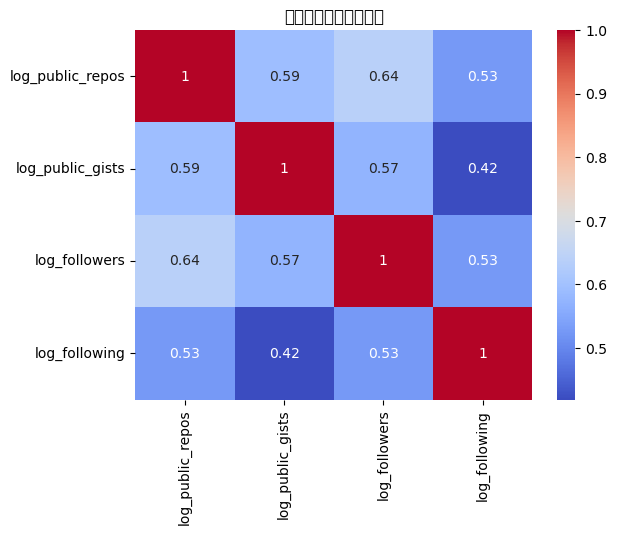

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

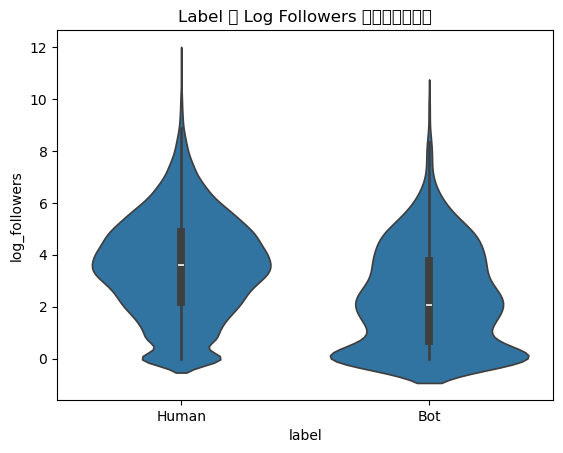

In [9]:
# 热图：展示特征之间的相关性
corr_matrix = data[[f'log_{col}' for col in numeric_cols]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("特征之间的相关性热图")
plt.show()

# 小提琴图：展示label与log_followers之间的分布差异
if 'label' in data.columns and 'log_followers' in data.columns:
    sns.violinplot(x='label', y='log_followers', data=data)
    plt.title("Label 与 Log Followers 之间的分布差异")
    plt.show()

In [13]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
# 9. 生成pandas_profiling报告
profile = ProfileReport(data, explorative=True)
profile.to_file("github_bot_data_analysis_report.html")

print("数据分析报告已生成：github_bot_data_analysis_report.html")


NameError: name 'ProfileReport' is not defined

数据的前几行：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6 

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


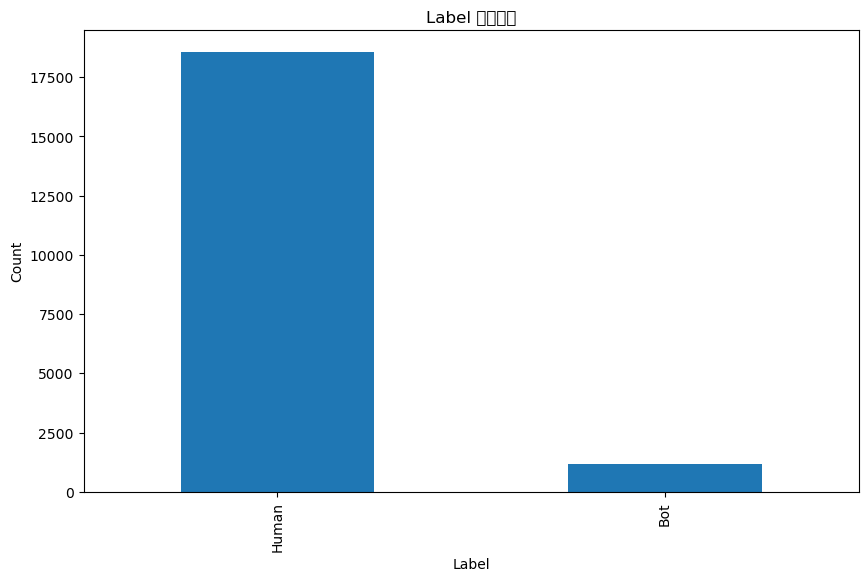

<Figure size 1000x600 with 0 Axes>

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23572 (\N{CJK UNIFIED IDEOGRAPH-5C14}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

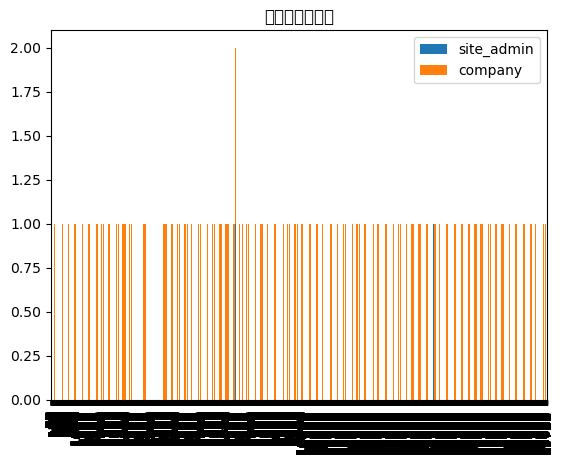

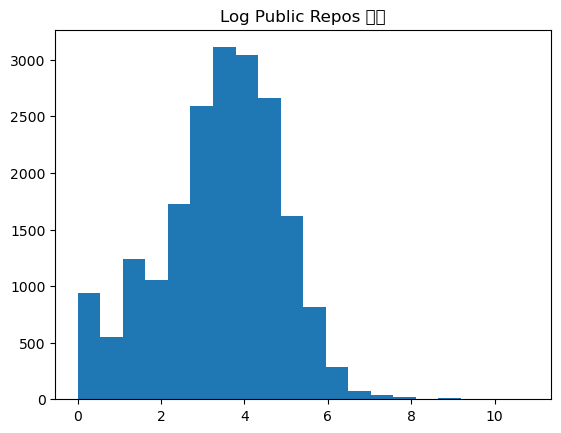

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


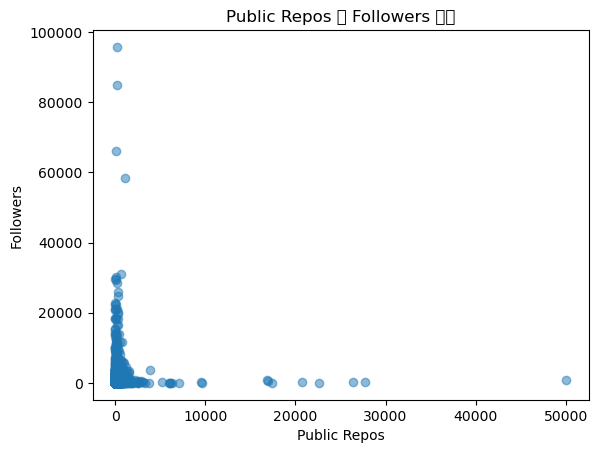

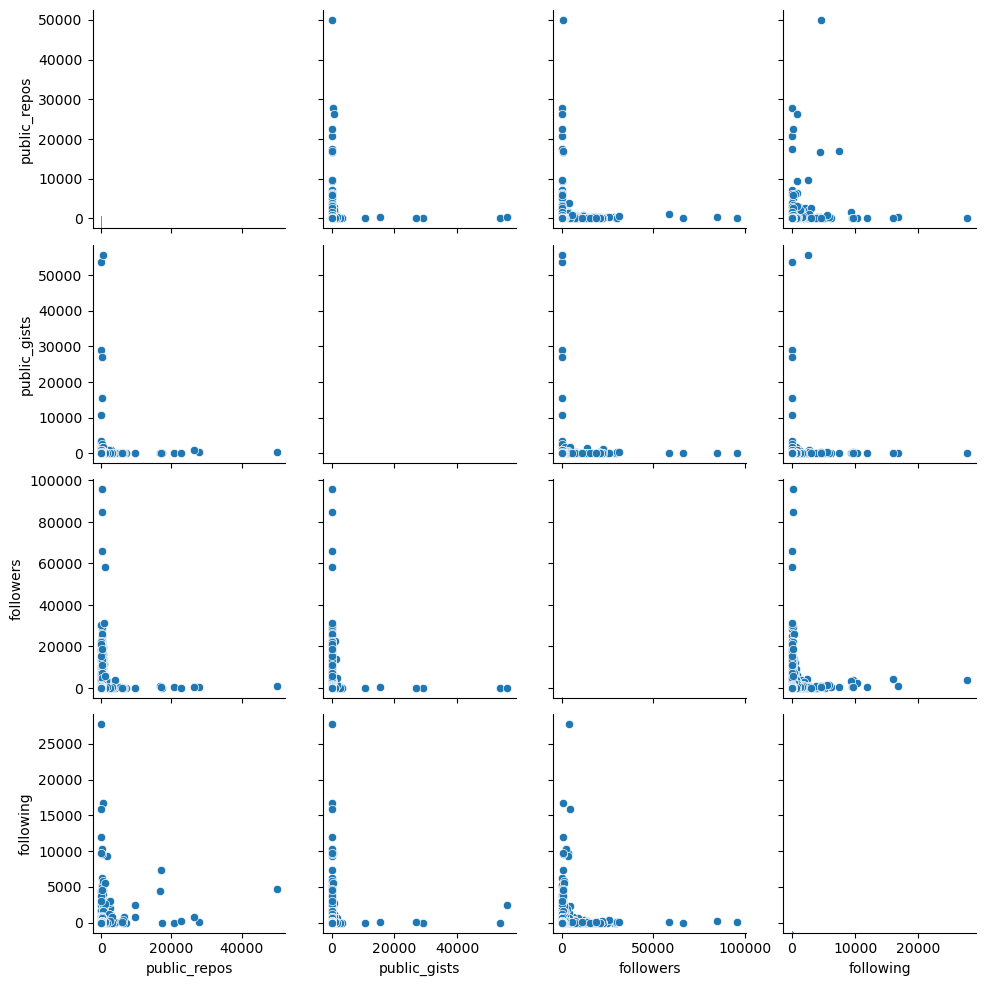

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

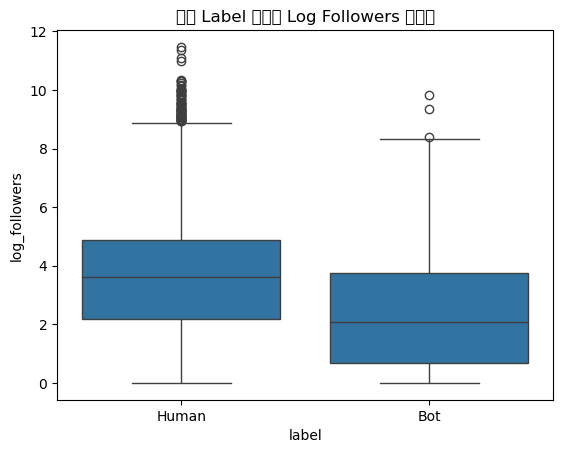

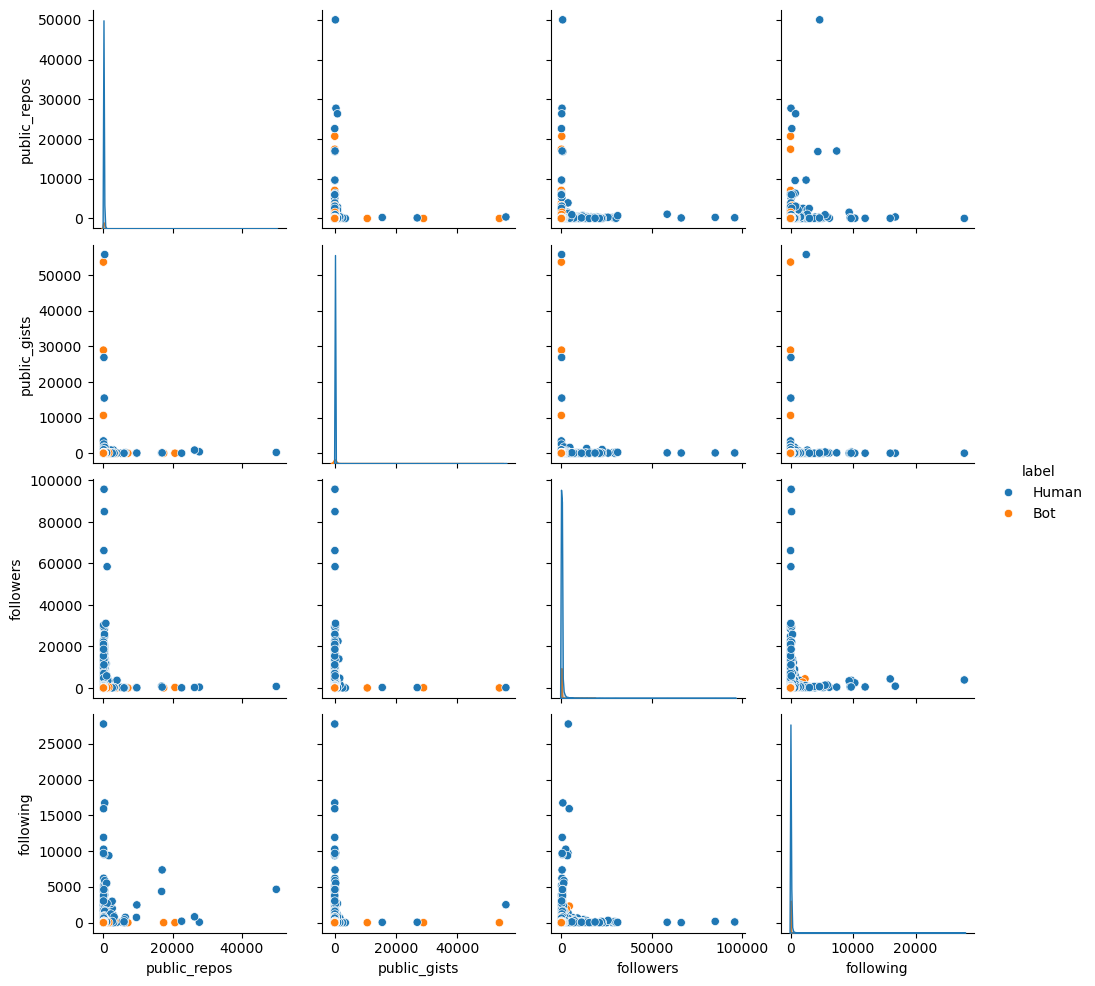

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

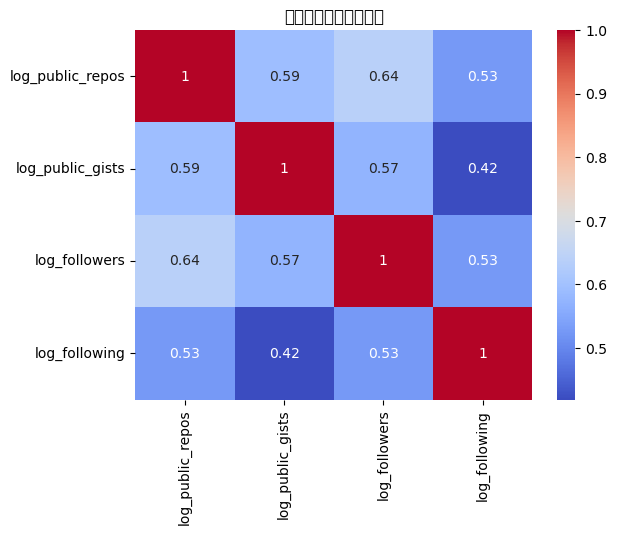

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

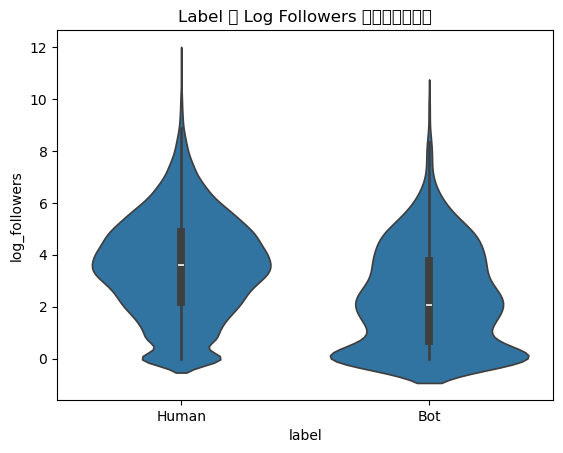

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

数据分析报告已生成：github_bot_data_analysis_report.html


In [14]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# 文件路径
file_path = r'C:\Users\86189\Desktop\github_bot_processed_data.csv'

# 1. 读取数据集
data = pd.read_csv(file_path)

# 2. 探索pandas显示选项，显示更多数据行和列
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

# 3. 查看数据的前几行和数据类型
print("数据的前几行：")
print(data.head())

print("\n数据的信息：")
print(data.info())

# 4. 生成数据的描述性统计信息
print("\n数据的描述性统计信息：")
print(data.describe())

# 5. 格式化处理日期、货币、百分比等
if 'date' in data.columns:
    data['formatted_date'] = pd.to_datetime(data['date'])
if 'salary' in data.columns:
    data['formatted_salary'] = data['salary'].apply(lambda x: f"${x:,.2f}")
if 'percentage' in data.columns:
    data['formatted_percentage'] = data['percentage'].apply(lambda x: f"{x:.2%}")

# 6. 对数变换
numeric_cols = ['public_repos', 'public_gists', 'followers', 'following']
for col in numeric_cols:
    if col in data.columns:
        data[f'log_{col}'] = np.log1p(data[col])

# 7. 使用Matplotlib绘制图表
plt.figure(figsize=(10, 6))
# 条形图：展示label列的类别分布
if 'label' in data.columns:
    data['label'].value_counts().plot(kind='bar')
    plt.title("Label 类别分布")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()

# 堆积柱状图：展示布尔特征分布
plt.figure(figsize=(10, 6))
bool_features = ['site_admin', 'company']
if all(col in data.columns for col in bool_features):
    data[bool_features].astype(int).plot(kind='bar', stacked=True)
    plt.title("布尔特征的分布")
    plt.show()

# 直方图：展示log_public_repos
if 'log_public_repos' in data.columns:
    plt.hist(data['log_public_repos'], bins=20)
    plt.title("Log Public Repos 分布")
    plt.show()

# 散点图：展示public_repos与followers之间的关系
if 'public_repos' in data.columns and 'followers' in data.columns:
    plt.scatter(data['public_repos'], data['followers'], alpha=0.5)
    plt.title("Public Repos 与 Followers 关系")
    plt.xlabel("Public Repos")
    plt.ylabel("Followers")
    plt.show()

# 散点矩阵：展示数值特征之间的成对关系
sns.pairplot(data[numeric_cols])
plt.show()

# 8. 使用Seaborn绘制图表
# 箱线图：展示不同label类别下log_followers的分布
if 'label' in data.columns and 'log_followers' in data.columns:
    sns.boxplot(x='label', y='log_followers', data=data)
    plt.title("不同 Label 类别下 Log Followers 的分布")
    plt.show()

# 成对图：展示不同特征之间的关系
sns.pairplot(data[numeric_cols + ['label']], hue='label')
plt.show()

# 热图：展示特征之间的相关性
corr_matrix = data[[f'log_{col}' for col in numeric_cols]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("特征之间的相关性热图")
plt.show()

# 小提琴图：展示label与log_followers之间的分布差异
if 'label' in data.columns and 'log_followers' in data.columns:
    sns.violinplot(x='label', y='log_followers', data=data)
    plt.title("Label 与 Log Followers 之间的分布差异")
    plt.show()

# 9. 生成pandas_profiling报告
profile = ProfileReport(data, explorative=True)
profile.to_file("github_bot_data_analysis_report.html")

print("数据分析报告已生成：github_bot_data_analysis_report.html")
